<a href="https://colab.research.google.com/github/Mitasam/Data/blob/main/PINNs_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementación de una red neuronal básica con PyTorch

In [1]:
# Librerias a usar
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

Usando dispositivo: cuda


In [3]:
# Arquitectura de la Red

class BNN(nn.Module):
    def __init__(self):
        super(BNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 10),
            nn.Tanh(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.net(x)

# Instancia de la red
model = BNN().to(device)

In [4]:
# Generación y preparación de los datos
x_data = np.linspace(-2 * np.pi, 2 * np.pi, 100).reshape(-1, 1)
y_data = np.sin(x_data)

# Separación de los datos
x_train, x_temp, y_train, y_temp = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Convertir a tensores
x_train_tensor = torch.FloatTensor(x_train).to(device)
y_train_tensor = torch.FloatTensor(y_train).to(device)
x_val_tensor = torch.FloatTensor(x_val).to(device)
y_val_tensor = torch.FloatTensor(y_val).to(device)
x_test_tensor = torch.FloatTensor(x_test).to(device)
y_test_tensor = torch.FloatTensor(y_test).to(device)

#x_train_tensor.shape

In [5]:
# Perdida y optimizador
criterion = nn.MSELoss()  # Pérdida por error cuadrático medio
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [6]:
# Precisión
def calculate_accuracy(y_true, y_pred, epsilon=0.1):
    correct_predictions = torch.abs(y_true - y_pred) < epsilon
    accuracy = correct_predictions.sum().item() / len(y_true) * 100
    return accuracy

In [7]:
# Entrenar la red con validación
epochs = 1000
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(epochs):

    # Entrenamiento
    model.train()
    optimizer.zero_grad()
    y_pred = model(x_train_tensor)
    train_loss = criterion(y_pred, y_train_tensor)
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())

    # Validación

    model.eval()
    with torch.no_grad():
        y_val_pred = model(x_val_tensor)
        val_loss = criterion(y_val_pred, y_val_tensor)
        val_losses.append(val_loss.item())


    if epoch % 100 == 0:
        train_accuracy = calculate_accuracy(y_train_tensor, y_pred)
        train_accuracies.append(train_accuracy)
        val_accuracy = calculate_accuracy(y_val_tensor, y_val_pred)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch}, Train Loss: {train_loss.item():.4f}, Train Accuracy: {train_accuracy:.2f}, Val Loss: {train_loss.item():.4f}, Val Accuracy: {train_accuracy:.2f}%")

Epoch 0, Train Loss: 0.7192, Train Accuracy: 6.25, Val Loss: 0.7192, Val Accuracy: 6.25%
Epoch 100, Train Loss: 0.0815, Train Accuracy: 20.00, Val Loss: 0.0815, Val Accuracy: 20.00%
Epoch 200, Train Loss: 0.0594, Train Accuracy: 37.50, Val Loss: 0.0594, Val Accuracy: 37.50%
Epoch 300, Train Loss: 0.0495, Train Accuracy: 50.00, Val Loss: 0.0495, Val Accuracy: 50.00%
Epoch 400, Train Loss: 0.0454, Train Accuracy: 58.75, Val Loss: 0.0454, Val Accuracy: 58.75%
Epoch 500, Train Loss: 0.0430, Train Accuracy: 58.75, Val Loss: 0.0430, Val Accuracy: 58.75%
Epoch 600, Train Loss: 0.0341, Train Accuracy: 63.75, Val Loss: 0.0341, Val Accuracy: 63.75%
Epoch 700, Train Loss: 0.0281, Train Accuracy: 67.50, Val Loss: 0.0281, Val Accuracy: 67.50%
Epoch 800, Train Loss: 0.0198, Train Accuracy: 70.00, Val Loss: 0.0198, Val Accuracy: 70.00%
Epoch 900, Train Loss: 0.0105, Train Accuracy: 82.50, Val Loss: 0.0105, Val Accuracy: 82.50%


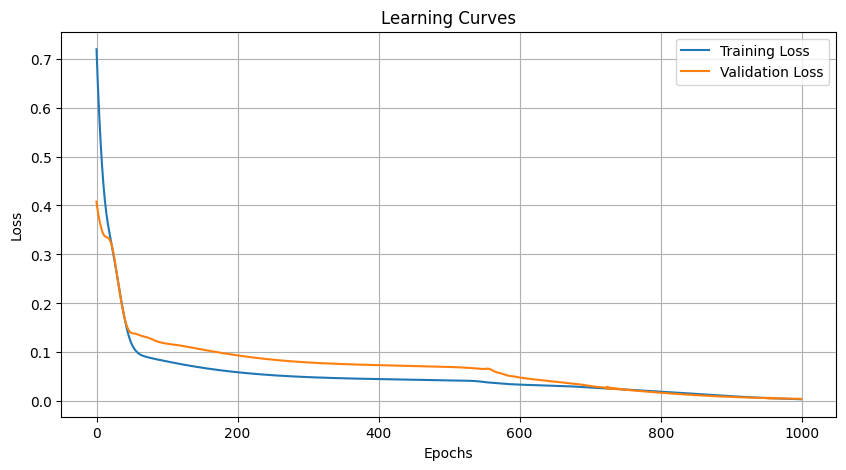

In [8]:
import matplotlib.pyplot as plt
#curva de aprendizaje
def plot_learning_curves(train_losses,val_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Learning Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    #plt.savefig('loss_model1RL.png',dpi=300)
    plt.show()
plot_learning_curves(train_losses,val_losses)

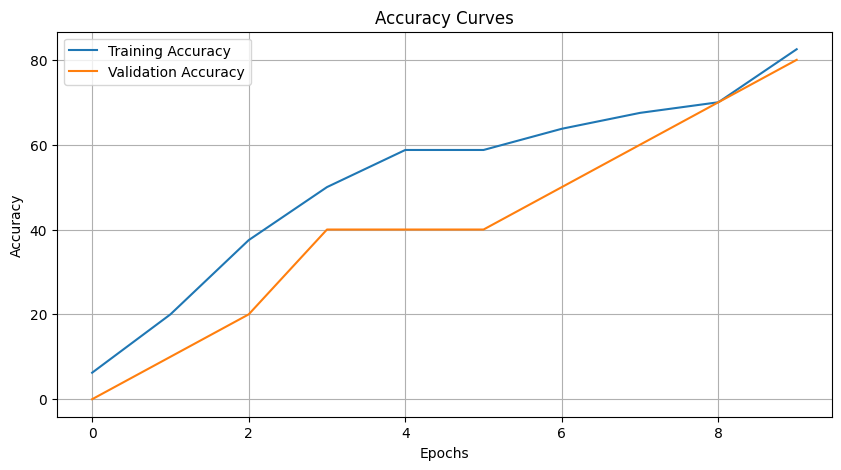

In [9]:
#curva de accuracy
def plot_accuracy_curves(train_accuracies,val_accuracies):
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_accuracy_curves(train_accuracies,val_accuracies)

In [10]:
# Evaluación en el conjunto de prueba
model.eval()
with torch.no_grad():
    y_test_pred = model(x_test_tensor)
    test_loss = criterion(y_test_pred, y_test_tensor)
    test_accuracy = calculate_accuracy(y_test_tensor, y_test_pred)
    print(f"Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_accuracy:.2f}")

Test Loss: 0.0013, Test Accuracy: 100.00


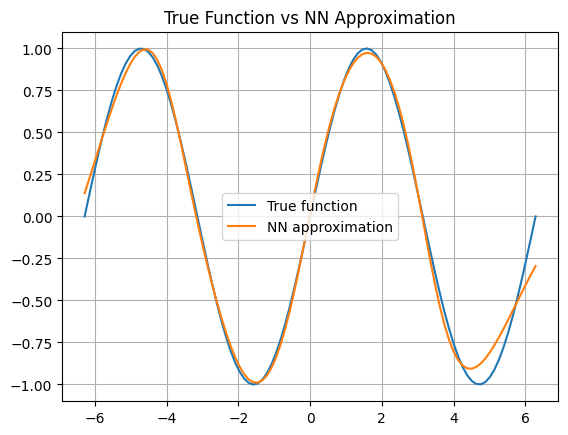

In [11]:
x_data_tensor = torch.FloatTensor(x_data)
y_data_tensor = torch.FloatTensor(y_data)

x_data_np = x_data_tensor.cpu().numpy()
y_data_np = y_data_tensor.cpu().numpy()

# Modelo en modo evaluación
model.eval()
with torch.no_grad():
    y_pred = model(x_data_tensor.to(model.net[0].weight.device)).cpu().detach().numpy()

# Visualización
plt.plot(x_data_np, y_data_np, label="True function")
plt.plot(x_data_np, y_pred, label="NN approximation")
plt.legend()
plt.title("True Function vs NN Approximation")
plt.grid(True)
plt.show()


In [12]:
# Guardar el modelo
torch.save(model.state_dict(), "model.pth")

# Cargar el modelo
model_loaded = BNN()
model_loaded.load_state_dict(torch.load("model.pth"))
model_loaded.eval()

<ipython-input-12-f395c783d7e4>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_loaded.load_state_dict(torch.load("model.pth"))


BNN(
  (net): Sequential(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): Tanh()
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)

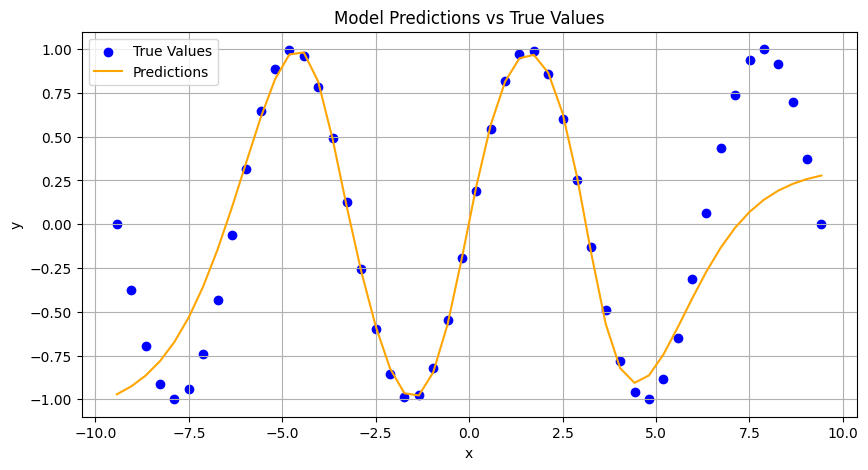

In [13]:
# Nuevos datos
x_new = np.linspace(-3 * np.pi, 3 * np.pi, 50).reshape(-1, 1)
x_new_tensor = torch.FloatTensor(x_new)

# Predicciones
with torch.no_grad():
    y_new_pred = model_loaded(x_new_tensor)

# Visualización
plt.figure(figsize=(10, 5))
plt.scatter(x_new, np.sin(x_new), label='True Values', color='blue')
plt.plot(x_new, y_new_pred.numpy(), label='Predictions', color='orange')
plt.title('Model Predictions vs True Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
